In [1]:

import os
import geopandas as gpd
import fiona
import pyproj

# Check GDAL and PROJ paths
print("GDAL_DATA:", os.environ.get('GDAL_DATA'))
print("PROJ_LIB:", os.environ.get('PROJ_LIB'))

# Check versions
print("Fiona version:", fiona.__version__)
print("PyProj version:", pyproj.__version__)


GDAL_DATA: C:\Users\Ian\anaconda3\envs\geoenv3\Library\share\gdal
PROJ_LIB: C:\Users\Ian\anaconda3\envs\geo_env\Library\share\proj
Fiona version: 1.10.1
PyProj version: 3.7.2


In [2]:

import os
os.environ['GDAL_DATA'] = r"C:\Users\Ian\anaconda3\envs\geo_env\Library\share\gdal"
os.environ['PROJ_LIB'] = r"C:\Users\Ian\anaconda3\envs\geo_env\Library\share\proj"



In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Reading a shapefile
gdf = gpd.read_file("C:\\Users\\Ian\\OneDrive - Northeastern University\\ONE\\GIS_6345\\GIS6345_HW_WIP\\G6345_HW_WK8\\DATA\\SI_DATA_EDU\\SI_DATA_EDU.shp")

# Display the first few rows
print(gdf.head())

       LOC_ID        POINT_X       POINT_Y  MaxOfARSEN  MaxOfLEAD_  \
0  AREA-1 SSW  789019.527533  3.129006e+06        27.0        18.0   
1     AREA-1S  789026.212559  3.129010e+06        57.6        22.2   
2   AREA-1S-2  789026.406457  3.129003e+06       124.0        32.6   
3   AREA-1S-3  789034.253882  3.128995e+06        57.9        17.8   
4   AREA-1S-4  789041.810953  3.128987e+06        34.2        17.8   

   MaxOfCYANI  MaxOfCADMI  MaxOfTOTAL  MaxOfNICKE  MaxOfZINC_  MaxOfTCLP_  \
0     -9999.0        1.90        29.0        29.0       200.0     -9999.0   
1     -9999.0        1.99     -9999.0        20.9        81.8     -9999.0   
2     -9999.0        3.62     -9999.0        19.4       135.0     -9999.0   
3     -9999.0        1.88     -9999.0        24.1        49.6     -9999.0   
4     -9999.0        1.26     -9999.0        19.2        44.0     -9999.0   

   MaxOfTCLP1                        geometry  
0     -9999.0  POINT (789019.528 3129006.073)  
1     -9999.0  POINT

In [4]:
gdf.crs

<Projected CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
gdf.explore()

In [6]:
print(gdf.columns)

Index(['LOC_ID', 'POINT_X', 'POINT_Y', 'MaxOfARSEN', 'MaxOfLEAD_',
       'MaxOfCYANI', 'MaxOfCADMI', 'MaxOfTOTAL', 'MaxOfNICKE', 'MaxOfZINC_',
       'MaxOfTCLP_', 'MaxOfTCLP1', 'geometry'],
      dtype='object')


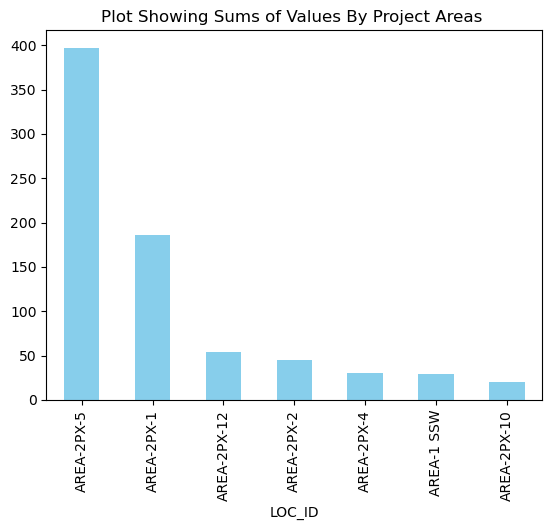

In [11]:

data_1= gdf.groupby('LOC_ID')['MaxOfTOTAL'].sum()
data_1=data_1[data_1>=0].sort_values(ascending=False)
data_1.plot(kind='bar', color='skyblue')
plt.title("Plot Showing Sums of Values By Project Areas ")
plt.show()
